In [24]:
import joblib
import re
import string

import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, classification_report, confusion_matrix, log_loss
from sklearn.model_selection import StratifiedKFold, train_test_split, learning_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

In [2]:
def preprocess_text(sen):
    sentence = re.sub('[^a-zA-Z]', ' ', sen)
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    sentence = re.sub(r'\s+', ' ', sentence)
    return sentence.lower()

data = pd.read_csv('Data-with-Label.csv')
data['prompt'] = data['prompt'].apply(preprocess_text)

In [3]:
vectorizer = CountVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words='english')
X = vectorizer.fit_transform(data['prompt']).toarray()

tfidf_vectorizer = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words='english')
X = tfidf_vectorizer.fit_transform(data['prompt']).toarray()
print(X)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.52798457]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.70710678]
 [0.         0.         0.         ... 0.         0.         0.70710678]
 [0.         0.         0.         ... 0.         0.         0.70710678]]


In [4]:
# Create a list of labels
labels = ['special', 'chat',]

# Create an instance of LabelEncoder
le = LabelEncoder()
yNgu = le.fit_transform(labels)

z = data['category'].map({'special': 1, 'chat': 0})
y = z
filtered_array = [num for num in z if num == 1]
print(yNgu)

[1 0]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(mean_squared_error)

<function mean_squared_error at 0x000001E092EAB640>


In [6]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [7]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)


print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix)
print("Classification Report:\n", classification_report)

Accuracy: 0.75
Confusion Matrix:
 [[17  0]
 [ 6  1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85        17
           1       1.00      0.14      0.25         7

    accuracy                           0.75        24
   macro avg       0.87      0.57      0.55        24
weighted avg       0.82      0.75      0.67        24



In [22]:
# clf = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=5000)
# history = clf.fit(X_train, y_train)

# # plot the loss curve
# plt.plot(history.loss_curve_)
# plt.title('Loss Curve')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.show()

# # plot the accuracy curve
# plt.plot(history.score(X_train, y_train))
# plt.plot(history.score(X_test, y_test))
# plt.title('Accuracy Curves')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend(['Train', 'Test'])
# plt.show()

define a neural network classifier model and train it for a specified number of epochs
clf = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=100, alpha=0.0001, solver='sgd', verbose=10, random_state=1, learning_rate_init=.1)
n_epochs = 60
train_accs = np.zeros(n_epochs)
val_accs = np.zeros(n_epochs)
train_losses = np.zeros(n_epochs)
val_losses = np.zeros(n_epochs)

for i in range(n_epochs):
    print(f"Training epoch {i+1}/{n_epochs}")
    # train the model on the training set for one epoch
    clf.partial_fit(X_train, y_train, classes=np.unique(y_train))
    
    # compute the training and validation accuracies and losses
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    train_accs[i] = accuracy_score(y_train, y_train_pred)
    val_accs[i] = accuracy_score(y_test, y_test_pred)
    train_losses[i] = log_loss(y_train, y_train_pred)
    val_losses[i] = log_loss(y_test, y_test_pred)


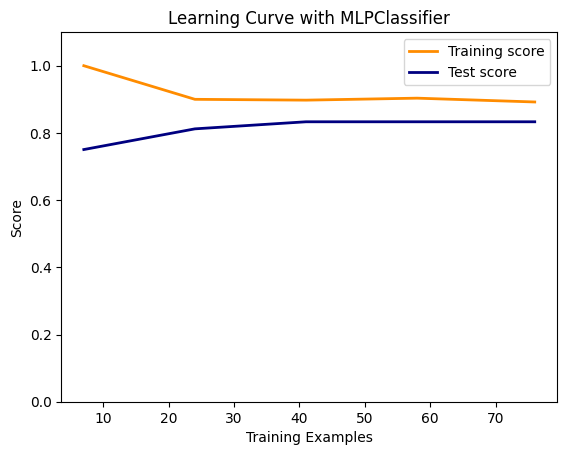

In [27]:
train_sizes, train_scores, test_scores = learning_curve(MLPClassifier(hidden_layer_sizes=(30,), max_iter=1500), X_train, y_train, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.title("Learning Curve with MLPClassifier")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(train_sizes, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.plot(train_sizes, test_scores_mean, label="Test score",
             color="navy", lw=lw)
plt.legend(loc="best")
plt.show()